# Energy Compaction Properties Of Transforms

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math
import cmath
from scipy.fftpack import dct,idct
from numpy.linalg import inv
%matplotlib inline 

# Declaration of Input Vector

In [179]:
n = np.arange(0,64,1)
x = (0.75)**n

In [180]:
x

array([  1.00000000e+00,   7.50000000e-01,   5.62500000e-01,
         4.21875000e-01,   3.16406250e-01,   2.37304688e-01,
         1.77978516e-01,   1.33483887e-01,   1.00112915e-01,
         7.50846863e-02,   5.63135147e-02,   4.22351360e-02,
         3.16763520e-02,   2.37572640e-02,   1.78179480e-02,
         1.33634610e-02,   1.00225958e-02,   7.51694682e-03,
         5.63771011e-03,   4.22828259e-03,   3.17121194e-03,
         2.37840895e-03,   1.78380672e-03,   1.33785504e-03,
         1.00339128e-03,   7.52543458e-04,   5.64407594e-04,
         4.23305695e-04,   3.17479271e-04,   2.38109454e-04,
         1.78582090e-04,   1.33936568e-04,   1.00452426e-04,
         7.53393193e-05,   5.65044895e-05,   4.23783671e-05,
         3.17837753e-05,   2.38378315e-05,   1.78783736e-05,
         1.34087802e-05,   1.00565852e-05,   7.54243887e-06,
         5.65682915e-06,   4.24262187e-06,   3.18196640e-06,
         2.38647480e-06,   1.78985610e-06,   1.34239207e-06,
         1.00679406e-06,

In [181]:
# This is the transpose of the input vector used for Transform Computations
X_tr = x.transpose()

## DFT 

In [182]:
def dft_matrix(N):
    W = np.ndarray((N,N),dtype = complex)
    for i in range(N):
        for j in range(N):
            W[i][j] = cmath.exp(complex(0,float(-2*math.pi/N*i*j)))
    return W

In [183]:
# Creating a new DFT computation matrix of size 16
Y = dft_matrix(64)

In [184]:
# z is the DFT of X
z = np.matmul(Y,X_tr)

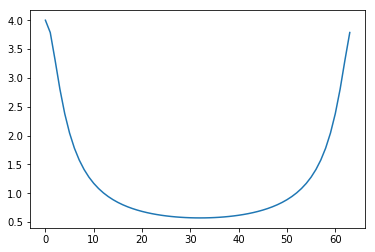

In [185]:
plt.plot(abs(z))

## IDFT

In [186]:
#Inverse Fourier Transform 

Dl = []
L = np.arange(1,64,1)
for j in range(len(L)):
    zm = []
    sum = 0
    for i in range(math.floor((65-L[j])/2)):
        zm.append(z[i])
    for i in range(math.floor((65-L[j])/2),math.ceil((65+L[j])/2)):
        zm.append(0)
    for i in range(math.ceil((65+L[j])/2),64):
        zm.append(z[i])
    dm = np.matmul(inv(Y),zm)
    for i in range(len(X_tr)):
        sum = sum + ((abs(X_tr[i]-dm[i]))**2)
        q = sum/64
    Dl.append(q)

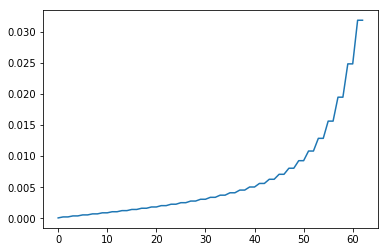

In [187]:
plt.plot(Dl)

## Haar Transform

In [188]:
# Haar Matrix transform 

def haarMatrix(n, normalized=True):
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h
A = haarMatrix(64)

In [189]:
b = np.matmul(A,X_tr)

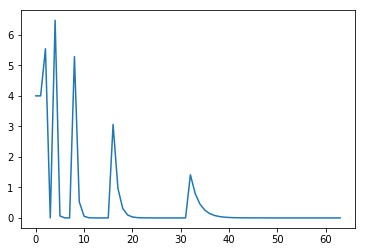

In [190]:
plt.plot(b)

## Inverse Haar Transform

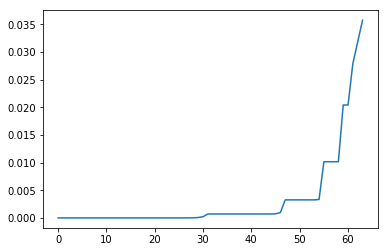

In [191]:
#Inverse haar Transform
El = []
for L in range(1,65):
    bm = []
    sum = 0
    for i in range(64-L):
        bm.append(b[i])
    for i in range(64-L,64):
        bm.append(0)
    xm = np.matmul(inv(A),bm)
    for i in range(len(X_tr)):
        sum = sum + ((X_tr[i]-xm[i])**2)
        q = sum/64
    El.append(q)
plt.plot(El)

## DCT

In [192]:
# DCT of X
c = dct(X_tr)

## IDCT

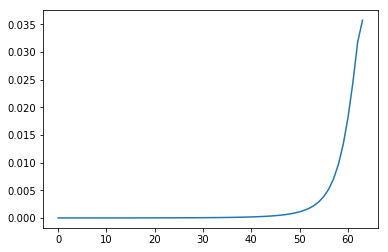

In [193]:
Cl = []
for L in range(1,65):
    cm = []
    sum = 0
    for i in range(64-L):
        cm.append(c[i])
    for i in range(64-L,64):
        cm.append(0)
    xm = idct(cm)/128
    for i in range(len(X_tr)):
        sum = sum + ((X_tr[i]-xm[i])**2)
        q = sum/64
    Cl.append(q)
plt.plot(Cl)

## Final Plot DFT vs DCT vs Haar

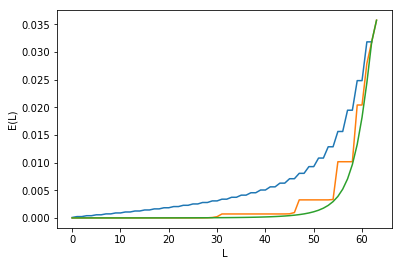

In [194]:
plt.plot(Dl)
plt.plot(El)
plt.plot(Cl)
'''plt.axis([0, 64, 0, 0.09])'''
plt.ylabel('E(L)')
plt.xlabel('L')